In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
import random
import cv2
import tensorflow as tf

In [4]:
# to know current working directory

os.getcwd()

'C:\\Users\\palash'

In [ ]:
#\Users\palash\OneDrive\Desktop\Imarticus\DL

In [7]:
os.chdir(r"C:\Users\palash\OneDrive\Desktop\Imarticus\DL")

In [8]:
os.getcwd()

'C:\\Users\\palash\\OneDrive\\Desktop\\Imarticus\\DL'

In [9]:
# to list file names in a folder

os.listdir(os.getcwd())

['.ipynb_checkpoints', 'data_out', 'Untitled.ipynb']

In [11]:
# join paths/ make paths
path = os.path.join(os.getcwd(),"data_out")
path

'C:\\Users\\palash\\OneDrive\\Desktop\\Imarticus\\DL\\data_out'

In [13]:
path

'C:\\Users\\palash\\OneDrive\\Desktop\\Imarticus\\DL\\data_out'

In [14]:
# check existing path

os.path.exists(path)

True

In [15]:
os.path.exists(os.path.join(path, "neutral"))

False

In [17]:
os.path.split('C:\\Users\\palash\\OneDrive\\Desktop\\Imarticus\\DL\\data_out\\Angry')[-1]

'Angry'

In [18]:
# to make folder
os.mkdir(os.path.join("data_out","temp"))

In [31]:
# to move file
src = r"C:\Users\palash\OneDrive\Desktop"
dst = os.path.join(os.getcwd(), "temp")
shutil.move(src, dst)

Error: Cannot move a directory 'C:\Users\palash\OneDrive\Desktop' into itself 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\temp'.

In [32]:
# shuffle data

img = os.listdir(os.path.join("data_out", "Angry"))
len(img)

169

In [33]:
type(img)

list

In [34]:
img[:5]

['img_Angry_0.jpg',
 'img_Angry_1.jpg',
 'img_Angry_10.jpg',
 'img_Angry_100.jpg',
 'img_Angry_101.jpg']

In [35]:
random.seed(42)
img2 = img.copy()
random.shuffle(img2)

In [36]:
num_train = int(0.8 * len(img))
num_train

135

In [37]:
train_img = img[:num_train]
test_img = img[num_train:]

In [39]:
#len(test_img)
os.getcwd()

'C:\\Users\\palash\\OneDrive\\Desktop\\Imarticus\\DL'

In [40]:
paths = {
    "data": os.path.join(os.getcwd(),"data"),
    "train": os.path.join(os.getcwd(),"data","train"),
    "test": os.path.join(os.getcwd(),"data","test")
}

In [42]:
os.mkdir(paths["data"])
os.mkdir(paths["train"])
os.mkdir(paths["test"])

In [43]:
os.mkdir(os.path.join(paths["train"], "Angry"))
os.mkdir(os.path.join(paths["test"], "Angry"))

In [45]:
folder_path = r"C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data_out\Angry"
img_name = "img_Angry_0.jpg"

os.path.join(folder_path, img_name)

'C:\\Users\\palash\\OneDrive\\Desktop\\Imarticus\\DL\\data_out\\Angry\\img_Angry_0.jpg'

In [46]:
for i in train_img:
  src_path = os.path.join(folder_path, i)
  dst_path = os.path.join(paths["train"], "Angry")
  shutil.copy(src_path,dst_path)

In [47]:
def img_prep(folder_path, test_size = 0.2):
  paths = {
    "data": os.path.join(os.getcwd(),"data"),
    "train": os.path.join(os.getcwd(),"data","train"),
    "test": os.path.join(os.getcwd(),"data","test")
  }

  folder_name = os.path.split(folder_path)[-1]
  img_names = os.listdir(folder_path)

  # shuffle img_names
  random.seed(42)
  random.shuffle(img_names)

  #split into train-test
  num_test = int(test_size * len(img_names))
  test_img = img_names[:num_test]
  train_img = img_names[num_test:]

  # create folders
  if not(os.path.exists(paths["data"])):
    os.mkdir(paths["data"])

  if not(os.path.exists(paths["train"])):
    os.mkdir(paths["train"])

  if not(os.path.exists(paths["test"])):
    os.mkdir(paths["test"])


  # make category folder
  os.mkdir(os.path.join(paths["train"], folder_name))
  os.mkdir(os.path.join(paths["test"], folder_name))

  dst_train_path = os.path.join(paths["train"], folder_name)
  dst_test_path = os.path.join(paths["test"], folder_name)

  # train loop
  for img in train_img:
    src_train_path = os.path.join(folder_path, img)
    shutil.move(src_train_path, dst_train_path)

  # test loop
  for img in test_img:
    src_test_path = os.path.join(folder_path, img)
    shutil.move(src_test_path, dst_test_path)

  print(f"for {folder_name} category")
  print(f"no. of train_images: {len(train_img)}")
  print(f"no. of test_images: {len(test_img)}")
  print("---*---" * 5)

In [49]:
for folder in os.listdir("data_out"):
  img_prep(os.path.join("data_out", folder))

for Angry category
no. of train_images: 136
no. of test_images: 33
---*------*------*------*------*---
for Happy category
no. of train_images: 165
no. of test_images: 41
---*------*------*------*------*---
for Sad category
no. of train_images: 106
no. of test_images: 26
---*------*------*------*------*---
for temp category
no. of train_images: 0
no. of test_images: 0
---*------*------*------*------*---


In [50]:
paths = {
    "data": os.path.join(os.getcwd(),"data"),
    "train": os.path.join(os.getcwd(),"data","train"),
    "test": os.path.join(os.getcwd(),"data","test")
  }

In [52]:
# Walk through data directory and list number of files
for dirpath, dirnames, filenames in os.walk(paths["data"]):
  print(f"There are {len(dirnames)} folder and {len(filenames)} images in '{dirpath}'.")

There are 2 folder and 0 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data'.
There are 3 folder and 0 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data\test'.
There are 0 folder and 33 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data\test\Angry'.
There are 0 folder and 41 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data\test\Happy'.
There are 0 folder and 26 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data\test\Sad'.
There are 3 folder and 0 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data\train'.
There are 0 folder and 136 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data\train\Angry'.
There are 0 folder and 165 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data\train\Happy'.
There are 0 folder and 106 images in 'C:\Users\palash\OneDrive\Desktop\Imarticus\DL\data\train\Sad'.


In [53]:
height = []
width = []
for folder in os.listdir(paths["train"]):
  for file in os.listdir(os.path.join(paths["train"], folder)):
    img_path = os.path.join(paths["train"], folder , file)
    img = cv2.imread(img_path)
    img_height = img.shape[0]
    img_width = img.shape[1]
    height.append(img_height)
    width.append(img_width)

In [54]:
pd.Series(height).describe()

count     407.000000
mean      367.174447
std       244.671584
min       106.000000
25%       216.500000
50%       306.000000
75%       431.000000
max      1911.000000
dtype: float64

In [55]:
pd.Series(width).describe()

count     407.000000
mean      367.174447
std       244.671584
min       106.000000
25%       216.500000
50%       306.000000
75%       431.000000
max      1911.000000
dtype: float64

In [56]:
pd.Series(height).mode()

0    385
dtype: int64

<Axes: ylabel='Density'>

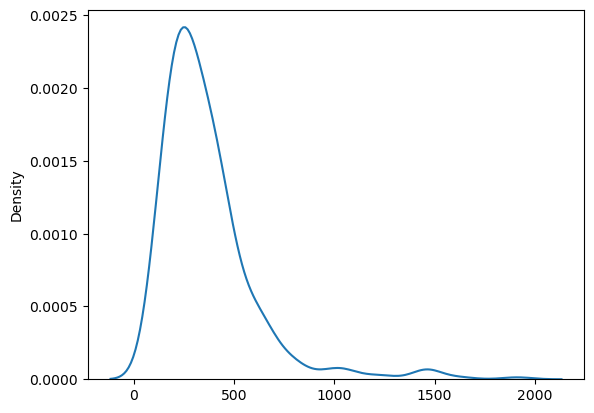

In [57]:
sns.kdeplot(pd.Series(height))

In [58]:
# image_dataset_from_directory

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    directory = paths["train"],
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(350, 350),
    shuffle=True,
    seed=42
)

test_ds = image_dataset_from_directory(
    directory = paths["test"],
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(350, 350),
    shuffle = False
)

Found 407 files belonging to 3 classes.
Found 100 files belonging to 3 classes.


In [59]:
for img, label in test_ds.take(4):
  print(img)
  print(label)

tf.Tensor(
[[[[208.        169.        172.       ]
   [208.67143   170.88      173.74571  ]
   [210.78572   176.8       179.24286  ]
   ...
   [179.44286    88.442856   83.442856 ]
   [179.8657     88.86571    83.86571  ]
   [180.         89.         84.       ]]

  [[214.17714   176.65428   179.11714  ]
   [214.52399   178.17363   180.52023  ]
   [215.61617   182.95796   184.93849  ]
   ...
   [179.57715    88.57714    83.57714  ]
   [180.         88.99999    83.99999  ]
   [180.1343     89.134285   84.134285 ]]

  [[233.62857   200.75714   201.52856  ]
   [232.95331   201.14082   201.85278  ]
   [230.82693   202.34898   202.87367  ]
   ...
   [180.         89.         84.       ]
   [180.42285    89.42285    84.42285  ]
   [180.55714    89.557144   84.557144 ]]

  ...

  [[252.        221.        174.       ]
   [251.8657    221.26857   174.1343   ]
   [251.44286   222.11429   174.55714  ]
   ...
   [211.08183   147.08183   122.08183  ]
   [212.11479   148.11479   123.1148   ]
   [2

In [60]:
train_ds.class_names

['Angry', 'Happy', 'Sad']

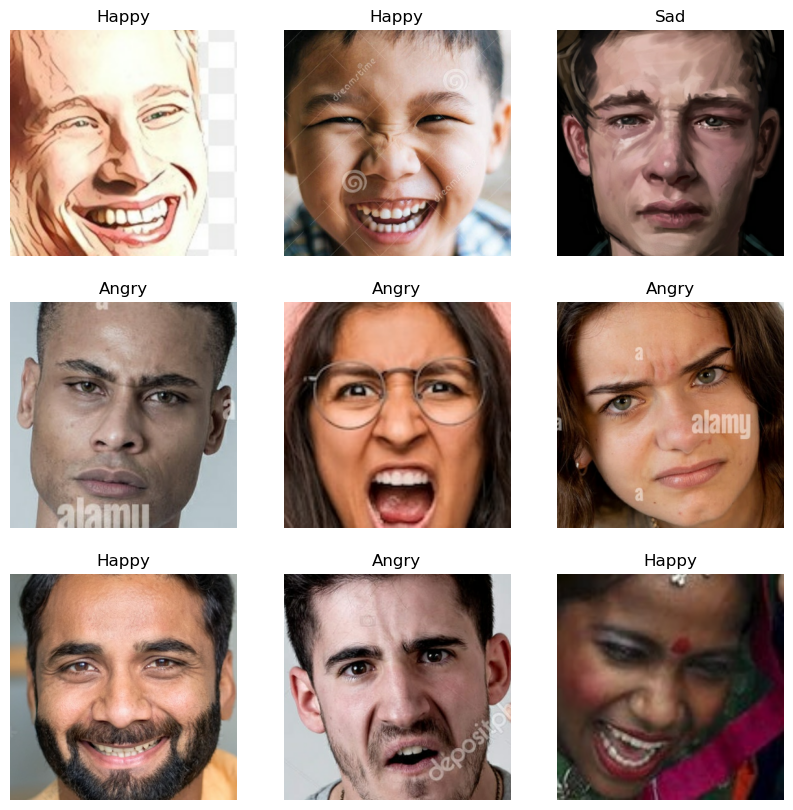

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [64]:
# model building
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPooling2D


model = tf.keras.models.Sequential([
    InputLayer(input_shape = (350,350,3)),
    Conv2D(
        filters = 10,
        kernel_size = (3,3),
        strides=(1,1),
        padding='valid',
        activation = "relu"
    ),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Conv2D(10,3,1,activation = "relu"),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(3, activation = "softmax")
])

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

result = model.fit(
    train_ds, validation_data = test_ds, epochs = 5
)






Epoch 1/5


13/13 [==============================] - 20s 1s/step - loss: 103.3508 - accuracy: 0.3464 - val_loss: 5.7821 - val_accuracy: 0.3000
Epoch 2/5
13/13 [==============================] - 10s 740ms/step - loss: 1.4569 - accuracy: 0.6339 - val_loss: 1.6814 - val_accuracy: 0.4900
Epoch 3/5
13/13 [==============================] - 10s 748ms/step - loss: 0.4025 - accuracy: 0.8305 - val_loss: 1.3027 - val_accuracy: 0.6100
Epoch 4/5
13/13 [==============================] - 11s 797ms/step - loss: 0.1973 - accuracy: 0.9509 - val_loss: 0.9845 - val_accuracy: 0.6800
Epoch 5/5
13/13 [==============================] - 10s 771ms/step - loss: 0.0970 - accuracy: 0.9902 - val_loss: 1.0608 - val_accuracy: 0.6800


In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 346, 346, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 173, 173, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 171, 171, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 169, 169, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 84, 84, 10)        0         
 g2D)                                                   

In [66]:
# from image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1.0/ 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.2, 0.8),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

In [67]:
train_ds = train_datagen.flow_from_directory(
    directory = paths["train"],
    target_size = (350,350),
    class_mode = "sparse",
    batch_size = 32,
    shuffle = True,
    seed = 42
)

test_ds = test_datagen.flow_from_directory(
    directory = paths["test"],
    target_size = (350,350),
    class_mode = "sparse",
    batch_size = 32,
    shuffle = False
)

Found 407 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [68]:
# model building
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPooling2D


model1 = tf.keras.models.Sequential([
    InputLayer(input_shape = (350,350,3)),
    Conv2D(
        filters = 10,
        kernel_size = (3,3),
        strides=(1,1),
        padding='valid',
        activation = "relu"
    ),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Conv2D(10,3,1,activation = "relu"),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(3, activation = "softmax")
])

model1.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

result1 = model1.fit(
    train_ds, validation_data = test_ds, epochs = 5
)


Epoch 1/5
13/13 [==============================] - 22s 2s/step - loss: 1.1003 - accuracy: 0.3391 - val_loss: 1.1788 - val_accuracy: 0.4100
Epoch 2/5
13/13 [==============================] - 20s 2s/step - loss: 1.0891 - accuracy: 0.3686 - val_loss: 1.1476 - val_accuracy: 0.4100
Epoch 3/5
13/13 [==============================] - 20s 2s/step - loss: 1.0660 - accuracy: 0.4054 - val_loss: 1.1789 - val_accuracy: 0.4100
Epoch 4/5
13/13 [==============================] - 20s 2s/step - loss: 1.0736 - accuracy: 0.3882 - val_loss: 1.1407 - val_accuracy: 0.4100
Epoch 5/5
13/13 [==============================] - 20s 2s/step - loss: 1.0903 - accuracy: 0.4054 - val_loss: 1.1036 - val_accuracy: 0.4100


In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 346, 346, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 173, 173, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 171, 171, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 169, 169, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 84, 84, 10)        0         
 g2D)                                                   

In [72]:
pip install albumentations --user

Note: you may need to restart the kernel to use updated packages.


In [73]:
import albumentations as A
import cv2

ModuleNotFoundError: No module named 'albumentations'

In [ ]:
efficientnet = tf.keras.applications.EfficientNetV2B0(include_top=False)